In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_IND = df[df['job_country'] == 'India']

In [7]:
df_skills = df_IND.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,NaN,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,NaN,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}"
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,NaN,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,NaN,NaN,NaN,Diebold Nixdorf,NaN,NaN
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,NaN,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [8]:
df_skills[['job_title_short' , 'job_skills']]

,job_title_short,job_skills
16,Data Engineer,powershell
16,Data Engineer,python
16,Data Engineer,sql
16,Data Engineer,mysql
16,Data Engineer,sql server
...,...,...
785716,Software Engineer,c#
785716,Software Engineer,sql
785718,Business Analyst,NaN
785740,Software Engineer,aws


In [9]:
df_skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count

job_skills  job_title_short      
airflow     Business Analyst           19
            Cloud Engineer             29
            Data Analyst               89
            Data Engineer            2990
            Data Scientist            327
                                     ... 
zoom        Data Scientist             32
            Senior Data Analyst         1
            Senior Data Engineer       14
            Senior Data Scientist       4
            Software Engineer          11
Length: 1689, dtype: int64

In [10]:
type(df_skills_count)

pandas.core.series.Series

In [11]:
#Changing df_skills_count into dataframe

df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,19
1,airflow,Cloud Engineer,29
2,airflow,Data Analyst,89
3,airflow,Data Engineer,2990
4,airflow,Data Scientist,327
...,...,...,...
1684,zoom,Data Scientist,32
1685,zoom,Senior Data Analyst,1
1686,zoom,Senior Data Engineer,14
1687,zoom,Senior Data Scientist,4


In [12]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [14]:
job_titles = df_skills_count['job_title_short'].unique()
job_titles

array(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Senior Data Engineer', 'Senior Data Scientist',
       'Software Engineer', 'Business Analyst', 'Senior Data Analyst',
       'Machine Learning Engineer', 'Cloud Engineer'], dtype=object)

In [17]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

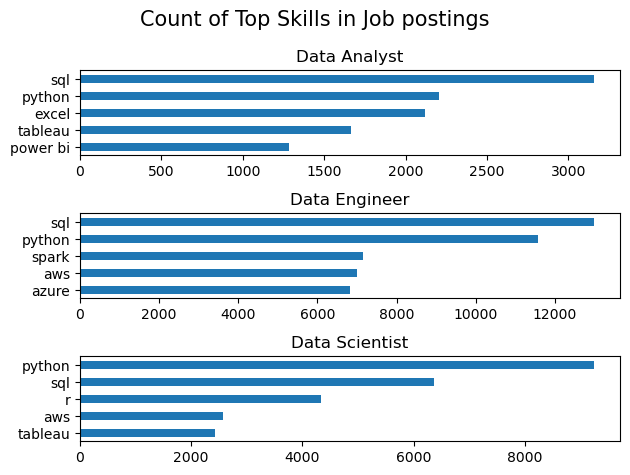

In [22]:
fig , ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job postings',fontsize=15)
fig.tight_layout(h_pad=1)
plt.show()

In [ ]:
# % of skill in a job posting = (skillcount in postings) / (total no of postings)

In [26]:
df_job_title_count = df_IND['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [29]:
# Now we are gonna merge above df with the skills count df

df_skills_perc = pd.merge(df_skills_count , df_job_title_count , how = 'left' , on = 'job_title_short')
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,sql,Data Engineer,12993,19062
1,python,Data Engineer,11568,19062
2,python,Data Scientist,9248,13279
3,spark,Data Engineer,7157,19062
4,aws,Data Engineer,6993,19062
...,...,...,...,...
1684,esquisse,Data Scientist,1,13279
1685,node.js,Senior Data Analyst,1,1083
1686,matlab,Cloud Engineer,1,351
1687,fastapi,Cloud Engineer,1,351


In [30]:
df_skills_perc['skills_perc'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


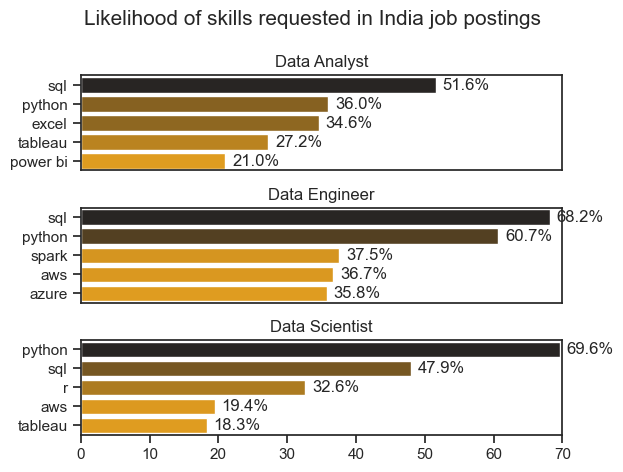

In [54]:

fig , ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh',x='job_skills',y='skills_perc',ax=ax[i],title=job_title)
    sns.barplot(data=df_plot , x = 'skills_perc' , y = 'job_skills',ax=ax[i],hue='skill_count',palette='dark:orange_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,70)

    for n,v in enumerate(df_plot['skills_perc']):
        ax[i].text(v +1 , n , f'{v:.1f}%' , va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    

fig.suptitle('Likelihood of skills requested in India job postings',fontsize=15)
fig.tight_layout(h_pad=1)
plt.show()